# Imports

In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import os

In [2]:
print (os.getcwd())
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
nlp = spacy.load("en_core_web_sm")

E:\W207Project\Notebooks


# Configs

In [3]:
DATA_FOLDER  = '../Data/'
TRAINING_DATA = 'train.csv'
SAMPLE_TEST_DATA = 'test.csv'

# Load Data

In [4]:
training_data = pd.read_csv(DATA_FOLDER + TRAINING_DATA)

In [5]:
training_data.head(20)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


# EDA

In [6]:
training_data.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [7]:
# Discource Types
discourse_types = training_data.discourse_type.unique()
print(discourse_types)

['Lead' 'Position' 'Claim' 'Evidence' 'Counterclaim' 'Rebuttal'
 'Concluding Statement']


In [8]:
training_data['discourse_type'].value_counts()

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

In [9]:
# Discourse Effectiveness
training_data.discourse_effectiveness.unique()

array(['Adequate', 'Ineffective', 'Effective'], dtype=object)

In [10]:
training_data['discourse_effectiveness'].value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

In [11]:
# Discourse Text Length
def text_length(text, spacy=False):
    if spacy:
        doc = nlp(text)
    else:
        doc = text.split()
    return len(doc)

training_data['discourse_text_length'] = [text_length(text, False) for text in training_data['discourse_text'].values]

In [12]:
training_data['discourse_text_length'].describe([0.01, 0.1, 0.75, 0.90, 0.95, 0.99])

count    36765.000000
mean        44.654073
std         46.669682
min          1.000000
1%           4.000000
10%          9.000000
50%         28.000000
75%         57.000000
90%        101.000000
95%        136.000000
99%        222.000000
max        836.000000
Name: discourse_text_length, dtype: float64

In [13]:
for discource_type in discourse_types:
    print(discource_type)
    print(training_data[training_data['discourse_type'] == discource_type]['discourse_text_length'].describe())
    print('-'*50)

Lead
count    2291.000000
mean       53.405936
std        37.786764
min         1.000000
25%        26.000000
50%        46.000000
75%        71.000000
max       542.000000
Name: discourse_text_length, dtype: float64
--------------------------------------------------
Position
count    4024.000000
mean       18.794980
std        10.865021
min         1.000000
25%        11.000000
50%        16.000000
75%        24.000000
max        95.000000
Name: discourse_text_length, dtype: float64
--------------------------------------------------
Claim
count    11977.000000
mean        18.739584
std         11.013325
min          1.000000
25%         11.000000
50%         17.000000
75%         25.000000
max        115.000000
Name: discourse_text_length, dtype: float64
--------------------------------------------------
Evidence
count    12105.000000
mean        77.727716
std         59.751923
min          3.000000
25%         37.000000
50%         62.000000
75%        101.000000
max        836.00000

In [14]:
PAD_token = 0
class Voc:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD"}
        self.num_words = 2  # Count PAD (Masking) & Unknown

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

In [15]:
vocabulary = Voc('Kaggle Competition')
def prepareVocabulary(text,voc):
    voc.addSentence(text)
_ = training_data.apply(lambda x:prepareVocabulary(x['discourse_text'],vocabulary),axis=1)

print(f'Total words (cased) in Vocabulary: {len(vocabulary.word2count)}')

Total words (cased) in Vocabulary: 57915


In [16]:
training_data['discourse_text'][0]

"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform. "

array([[<AxesSubplot:title={'center':'discourse_text_length'}>]],
      dtype=object)

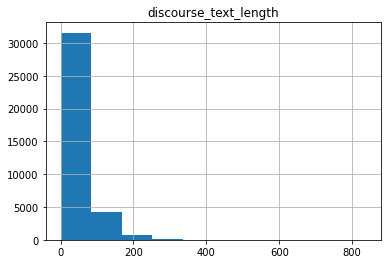

In [17]:
training_data.hist(column='discourse_text_length')

In [18]:
training_data.discourse_text_length

0        67
1        41
2        21
3        72
4        18
         ..
36760    21
36761     9
36762    23
36763    82
36764    11
Name: discourse_text_length, Length: 36765, dtype: int64

In [19]:
training_data.to_csv("file.tsv", sep = '\t')

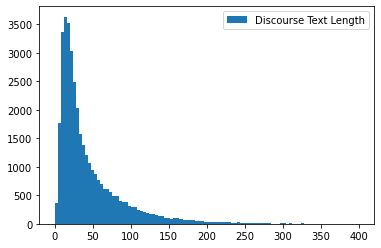

In [20]:
plt.hist([training_data.discourse_text_length], bins=100, range=(0, 400),
         label=['Discourse Text Length'])
plt.legend()
plt.show()

In [21]:
vocabulary.word2count

{'Hi,': 6,
 "i'm": 71,
 'Isaac,': 1,
 'going': 2076,
 'to': 57099,
 'be': 17789,
 'writing': 145,
 'about': 4595,
 'how': 3847,
 'this': 7325,
 'face': 1588,
 'on': 11480,
 'Mars': 714,
 'is': 25877,
 'a': 37948,
 'natural': 585,
 'landform': 421,
 'or': 10053,
 'if': 7327,
 'there': 5166,
 'life': 1348,
 'that': 26264,
 'made': 1219,
 'it.': 1444,
 'The': 7534,
 'story': 236,
 'NASA': 771,
 'took': 330,
 'picture': 529,
 'of': 33267,
 'and': 36473,
 'was': 5525,
 'seen': 277,
 'the': 77029,
 'planet.': 277,
 "doesn't": 567,
 'know': 3267,
 'created': 464,
 'by': 5567,
 'Mars,': 79,
 'it': 18048,
 'just': 4870,
 'landform.': 228,
 '': 40924,
 'On': 353,
 'my': 2705,
 'perspective,': 21,
 'I': 9250,
 'think': 4747,
 'because': 8295,
 'dont': 1156,
 'any': 1514,
 'Mars.': 246,
 'In': 3071,
 'these': 1930,
 'next': 556,
 'few': 566,
 'paragraphs,': 2,
 "I'll": 32,
 'talking': 311,
 'no': 2707,
 'we': 7323,
 'have': 14498,
 'descovered': 3,
 'yet': 232,
 'If': 2784,
 'would': 10438,
 'now.

In [22]:
max_value = max(vocabulary.word2count.values())
print(max_value)

77029


In [23]:
sorted = {k: v for k, v in sorted(vocabulary.word2count.items(), key=lambda item: item[1], reverse=True)}

In [24]:
sorted

{'the': 77029,
 'to': 57099,
 '': 40924,
 'a': 37948,
 'and': 36473,
 'of': 33267,
 'that': 26264,
 'is': 25877,
 'in': 22854,
 'it': 18048,
 'be': 17789,
 'they': 17651,
 'for': 17357,
 'you': 15936,
 'have': 14498,
 'are': 13989,
 'not': 11977,
 'on': 11480,
 'can': 10639,
 'would': 10438,
 'students': 10118,
 'or': 10053,
 'their': 9476,
 'I': 9250,
 'people': 8819,
 'because': 8295,
 'with': 8213,
 'will': 7704,
 'The': 7534,
 'if': 7327,
 'this': 7325,
 'we': 7323,
 'do': 7125,
 'more': 7124,
 'but': 6683,
 'as': 6393,
 'should': 6283,
 'by': 5567,
 'what': 5531,
 'was': 5525,
 'could': 5432,
 'at': 5368,
 'from': 5290,
 'like': 5266,
 'your': 5266,
 'get': 5261,
 'school': 5254,
 'there': 5166,
 'all': 5165,
 'vote': 4912,
 'just': 4870,
 'think': 4747,
 'them': 4687,
 'an': 4650,
 'about': 4595,
 'who': 4465,
 'one': 4443,
 'when': 4426,
 'make': 4338,
 'so': 4297,
 'help': 4256,
 'has': 4192,
 'some': 4049,
 'how': 3847,
 'also': 3768,
 'time': 3703,
 'electoral': 3632,
 'our':